128.976436

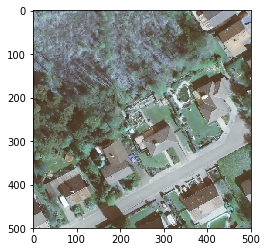

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

img = cv2.imread('test.png')
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_img = cv2.equalizeHist(gs_img)
hist_img  = cv2.medianBlur(hist_img,11)


plt.imshow(img)
cv2.imwrite('test_prep.png', hist_img)
hist_img.mean()

True

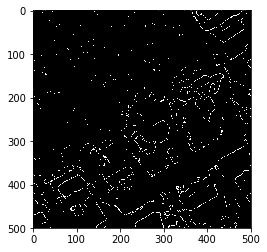

In [3]:
gss_img  = cv2.GaussianBlur(hist_img,(3,3),0.000001,0.000001)
lap_img = cv2.Laplacian(gss_img,cv2.CV_64F)
ret, lap_img = cv2.threshold(lap_img,20,255,cv2.THRESH_BINARY)
lap_img  = lap_img.astype(np.uint8)


plt.imshow(lap_img, cmap='gray')
cv2.imwrite('test_lap.png', lap_img)


True

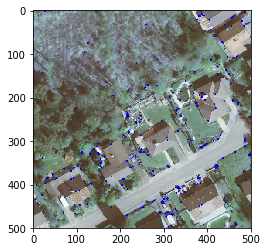

In [4]:
corn = np.float32(lap_img)
dst = cv2.cornerHarris(corn,2,3,0.1)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.1*dst.max()]=[0,0,255]

plt.imshow(img)
cv2.imwrite('test_corners.png', img)

In [4]:
'''
img2 = cv2.imread('test.png')
gs_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gs_img2 = cv2.equalizeHist(gs_img)
gs_img2  = cv2.GaussianBlur(gs_img2,(3,3),0,0)
im2, contours, hierarchy = cv2.findContours(gs_img2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=gs_img2[y:y+h,x:x+w]
    
    cv2.drawContours(img2, contours, -1, (0,255,0), 2)
plt.imshow(img2)
cv2.imwrite('test_boundbox.png', img2)
'''
'Not very helpful, same as edge detection'

'Not very helpful, same as edge detection'

In [5]:
corn_bin = np.where(dst>0.1*dst.max(), 1,0)
print (np.count_nonzero(corn_bin))

corn_list = []
far_thold = 100

            

3547


True

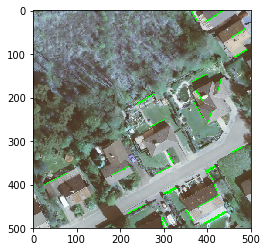

In [2]:
img2 = cv2.imread('test.png')
gs_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#gs_img2 = cv2.equalizeHist(gs_img)
gs_img2  = cv2.GaussianBlur(gs_img2,(3,3),0,0)

edges = cv2.Canny(gs_img2,220,250)
lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength=20,maxLineGap=3)

if lines.size != 0:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(img2,(x1,y1),(x2,y2),(0,255,0),2)


plt.imshow(img2)
cv2.imwrite('test_canny.png', edges)
cv2.imwrite('test_lines.png', img2)



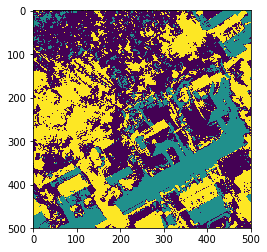

In [20]:
img = cv2.imread('test.png')

#img  = cv2.medianBlur(hist_img,11)
img = np.float32(img)
img = img.reshape((-1,3))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.001)
ret,label,center=cv2.kmeans(img,3,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

label = label.reshape(500,500)
#label += edges
img = img.reshape(500,500,3)
plt.imshow(label)
plt.savefig ( 'test_kmeans.png', dpi=2000)
#cv2.imwrite('test_col_prep.png', img.reshape(500,500,3))

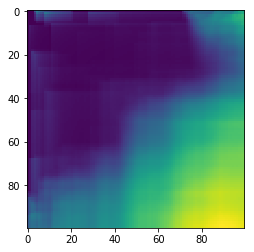

In [3]:
import seaborn as sns

pic = edges
sq = 100
ind = len(pic)//sq
sub = []

for i in range(sq):
    for j in range(sq):
        sub.append(pic[i:(i+1)*ind,j:(j+1)*ind])
        
means = [(i.mean()) for i in sub]

means = np.array(means).reshape(-1,sq)
#sns.heatmap(means)
im1 = plt.imshow(gs_img2)
im2 = plt.imshow(means)

plt.savefig('test_hmap.png', dpi=2000)
plt.show()


In [1]:
img2 = cv2.imread('data/0D_dop20rgbi_32296_5621_1_nw_result.png')
gs_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#gs_img2 = cv2.equalizeHist(gs_img)
gs_img2  = cv2.GaussianBlur(gs_img2,(3,3),0,0)

edges = cv2.Canny(gs_img2,220,250)

pic = edges
sq = 1000
ind = len(pic)//sq
sub = []

for i in range(sq):
    for j in range(sq):
        sub.append(pic[i:(i+1)*ind,j:(j+1)*ind])
        
means = [(i.mean()) for i in sub]

means = np.array(means).reshape(-1,sq)

im1 = plt.imshow(gs_img2)
im2 = plt.imshow(means)

print ('Saving plot')
plt.show()
plt.savefig('test_full_img.png', dpi=2000)



NameError: name 'cv2' is not defined

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('testb.png')
clean_img = cv2.imread('testb.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (20, 0, 0), (100, 255, 255))


mask = cv2.medianBlur(mask, 11, 11)
ret, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)))
mask = cv2.bitwise_not(mask)
img = cv2.bitwise_and(img, img, mask=mask)


params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 0
params.maxThreshold = 255

params.filterByArea = True
params.minArea = 600
params.maxArea = 50000

params.filterByCircularity = False
params.filterByInertia = False
params.maxInertiaRatio = 0.5
params.filterByConvexity = False
params.filterByColor = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(mask)
img = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#TODO: OFFSET is off
max_r = 0
for k in keypoints:
    if k.size > max_r:
        max_r = int(k.size)

print (len(keypoints))
subim = []
offset = 20
for k in keypoints:
    cen = (int(k.pt[1]),int(k.pt[0]))
    img[cen[0],cen[1]] = [0,0,255]
    blb = clean_img[int(cen[0]-(k.size//2)-offset):int(cen[0]+(k.size//2)+offset),\
          int(cen[1]-(k.size//2)-offset):int(cen[1]+(k.size//2)+offset)]
    
    blb = blb.clip(min=0, max=img.size)
    subim.append(blb)
    
j = 0
for i in subim:
    cv2.imwrite('split/im'+str(j)+'.png', i)
    j +=1
    
plt.imshow(img)
cv2.imwrite('test_masked.png', img)

#problem with this are big buildings or rows of buildings that produce a single big blob
#it is not very precise in the end
#it is probably just better to split the image in subsquares and use these for classification
#this can be used for preprocessing if wanna skip roof selection and have black surrounding instead of environmental 

467


True

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('testb.png')
clean_img = cv2.imread('testb.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (20, 0, 0), (100, 255, 255))


mask = cv2.medianBlur(mask, 25, 25)
ret, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10)))
mask = cv2.bitwise_not(mask)
img = cv2.bitwise_and(img, img, mask=mask)

size  = 75


sq = (len(img) // size)
ind = size
sub = []

for i in range(sq):
    for j in range(sq):
        im = img[i * ind:(i + 1) * ind, j * ind:(j + 1) * ind]
        clean = clean_img[i * ind:(i + 1) * ind, j * ind:(j + 1) * ind]
        if cv2.countNonZero(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)) > 0.15 * im.shape[0] * im.shape[1]:
            sub.append(clean)

for i in range(len(sub)):
    fname = 'split/'+ str(i) + '.png'
    cv2.imwrite(fname, sub[i])
    
#test of just splitting image and selecting subsquares with thershold, not very precise either